# 1. Download data and save to SDS
# 2. Load SDS data & Compute RSAM data (and related metrics)
# 3. Load SDS data & Generate spectrograms (and related metrics)
# 4. Browse RSAM data (and reduced displacement) with scrollable plots
# 5. Browse spectrograms

In [ ]:
# 1. Download data and save to SDS
import os
import sys
from obspy.core import UTCDateTime
LIBpath = os.path.join( os.getenv('HOME'),'Documents','GitHub', 'kitchensinkGT', 'LIB')
sys.path.append(LIBpath)
import obspyGT.SDS
import importlib
importlib.reload(obspyGT.SDS)
#startt = UTCDateTime("2019-12-01T00:00:00.000")
endt = UTCDateTime("2019-12-11T00:00:00.000")
startt = UTCDateTime("2019-06-01T00:00:00.000")
#endt = startt+86400*2
SDS_TOP=os.path.join(os.getenv('HOME'), 'SDS')
trace_ids = ['NZ.WIZ.10.HHZ', 'NZ.WSRZ.10.HHZ']
centerlat=-37.52
centerlon=177.1825
searchRadiusDeg=0.25
fdsnURL = "GEONET"


In [ ]:
import obspyGT.FDSNtools
inv = obspyGT.FDSNtools.get_inventory(fdsnURL, startt, endt, centerlat, centerlon, searchRadiusDeg, network='NZ', station='*', channel='HHZ')
print(inv)
#obspyGT.SDS.FDSN_to_SDS_daily_wrapper(startt, endt, SDS_TOP, centerlat=centerlat, centerlon=centerlon, searchRadiusDeg=searchRadiusDeg, fdsnURL='GEONET')
#obspyGT.SDS.FDSN_to_SDS_daily_wrapper(startt, endt, SDS_TOP, inv=inv, fdsnURL='GEONET')
#obspyGT.SDS.FDSN_to_SDS_daily_wrapper(startt, endt, SDS_TOP, trace_ids=trace_ids, fdsnURL='GEONET')

#

In [ ]:
# 2. Compute CSAM and Drs - should probably add code to remove 0s so i do not get dropouts
sys.path.append('../lib')
import RSAM
importlib.reload(RSAM)
RSAM.SDS_to_RSAM_wrapper(startt, endt, SDS_TOP, sourcelat=centerlat, sourcelon=centerlon, inv=inv, verbose=False)

In [ ]:
import obspy
st=obspy.read('/Users/thompsong/SDS/CSAM/mean/2019/NZ/WSRZ/HHZ.D/NZ.WSRZ.10.HHZ.D.2019.153')
st.plot()

In [ ]:
# 4. Browse RSAM data - just plot for now
rsamWI = RSAM.RSAMobj()
rsamWI.read(startt, endt, SDS_TOP, metric='mean', speed=1, corrected=True)
rsamWI.plot()
drsWI = RSAM.ReducedDisplacementObj()
drsWI.read(startt, endt, SDS_TOP, metric='median', speed=2)
drsWI.plot(type='log')

In [ ]:
def Trace_to_bins(tr, binsizeSecs=86400):
    startt = tr.stats.starttime
    endt = tr.stats.endtime
    windowstart = UTCDateTime(startt.year, startt.month, startt.day, 0, 0, 0)
    binstarts = []
    bins = []
    while windowstart < endt:
        print(windowstart)
        binstarts.append(windowstart)
        bins.append(tr.copy().trim(starttime=windowstart, endtime=windowstart+binsizeSecs).data)
        windowstart += binsizeSecs
    return bins, binstarts
    
bins, binstarts = Trace_to_bins(drsWI.stream[1])


def rsam_violinplot(bins, binstarts, ymax=None):
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

    all_labels = [t.strftime('%Y-%m-%d') for t in binstarts]
    

    # plot violin plot
    axs[0].violinplot(bins,
                  showmeans=True,
                  showmedians=True, showextrema=True, widths=0.99)
    axs[0].set_title('Violin plot')


    # plot box plot
    axs[1].boxplot(bins)
    axs[1].set_title('Box plot')
        
    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_xticks([y + 1 for y in range(len(bins))],
                  labels=all_labels, rotation=45, ha='right')
        ax.set_xlabel('Days')
        ax.set_ylabel('Observed values')
        
        # set ymax if asked
        if ymax:
            ax.set_ylim([0,ymax])
            
    plt.show()    
    
rsam_violinplot(bins, binstarts)

In [ ]:
import pandas as pd
def stream2dataframe(st):
    t = pd.Series(this_utcdt.datetime for this_utcdt in st[0].times(type="utcdatetime"))
    df = pd.DataFrame(t,columns=['UTCDateTime'])
    for tr in st:
        df[tr.id] = tr.data
    return df
df = stream2dataframe(rsamWI.stream)
print(df)

In [ ]:
#import sys
#sys.path.append('.')
#import obspy
sys.path.append('../lib')
import IceWeb
import importlib
importlib.reload(IceWeb)
import obspyGT.FDSNtools  

spstartt = UTCDateTime(2019,12,9,1,0,0)
spendt = UTCDateTime(2019,12,9,1,20,0)
inv = obspyGT.FDSNtools.get_inventory(fdsnURL, spstartt, spendt, centerlat, centerlon, searchRadiusDeg, network='NZ', station='*', channel='HHZ')
SDS_to_spectrogram_wrapper(spstartt, spendt, SDS_TOP, trace_ids, windowlength=600, overwrite=True, equal_scale=True, dbscale=True, inv=inv, clim=[1e-8, 1e-5])

In [ ]:
import os
import sys
from obspy.core import UTCDateTime
import importlib
sys.path.append('../lib')
import IceWeb
importlib.reload(IceWeb)
#LIBpath = os.path.join( os.getenv('HOME'),'Documents','GitHub','kitchensinkGT', 'LIB')
#sys.path.append(LIBpath)
import FDSNtools 
import SDS
importlib.reload(SDS)

SDS_TOP=os.path.join(os.getenv('HOME'), 'SDS')
trace_ids = ['NZ.WIZ.10.HHZ', 'NZ.WSRZ.10.HHZ']
centerlat=-37.52
centerlon=177.1825
searchRadiusDeg=0.25
fdsnURL = "GEONET"

startt = UTCDateTime(2019,12,9)
endt = UTCDateTime(2019,12,10)
inv = FDSNtools.get_inventory(fdsnURL, startt, endt, centerlat, centerlon, searchRadiusDeg, network='NZ', station='*', channel='HHZ')

SDS.FDSN_to_SDS_daily_wrapper(startt, endt, SDS_TOP, trace_ids=trace_ids, \
        fdsnURL=fdsnURL, overwrite=True, inv=inv)

IceWeb.SDS_to_ICEWEB_wrapper(startt, endt, SDS_TOP, sampling_interval=60.0, sourcelat=centerlat, \
            sourcelon=centerlon, inv=inv, trace_ids=trace_ids, overwrite=True, verbose=False, sgrammins=10, \
                equal_scale=True, dbscale=True, clim=[1e-8, 1e-5])

In [ ]:
import sys
sys.path.append('.')
import obspy
import lib.IceWeb as IceWeb

fname = 'WhiteIslandFinal26Hours_VEL.mseed'
VEL = obspy.read(fname)
data_end_time = VEL[0].stats.endtime

nhours = 2

# Trim data to 1 hour
VEL.trim(starttime=data_end_time-3600*nhours, endtime=data_end_time)
data_start_time = VEL[0].stats.starttime
data_duration = data_end_time - data_start_time
print(data_start_time, data_end_time)

# Split into 10 minute windows
nummins = 10
start_time = data_end_time - nummins * 60
while start_time >= data_start_time:
    end_time = start_time + nummins * 60
    st = VEL.copy().trim(starttime=start_time,endtime=end_time)
    #st.plot();
    start_time = start_time - nummins * 60
    spobj = IceWeb.icewebSpectrogram(stream=st)
    sgramfile = '%s.%s.png' % (st[0].stats.network, st[0].stats.starttime.strftime('%Y%m%dT%H%M%S'))
    if os.path.isfile(sgramfile):
        continue
    else:
        print(sgramfile)
        spobj.plot(outfile=sgramfile, clim=[1e-8, 1e-5], dbscale=True, title='Fixed')
    

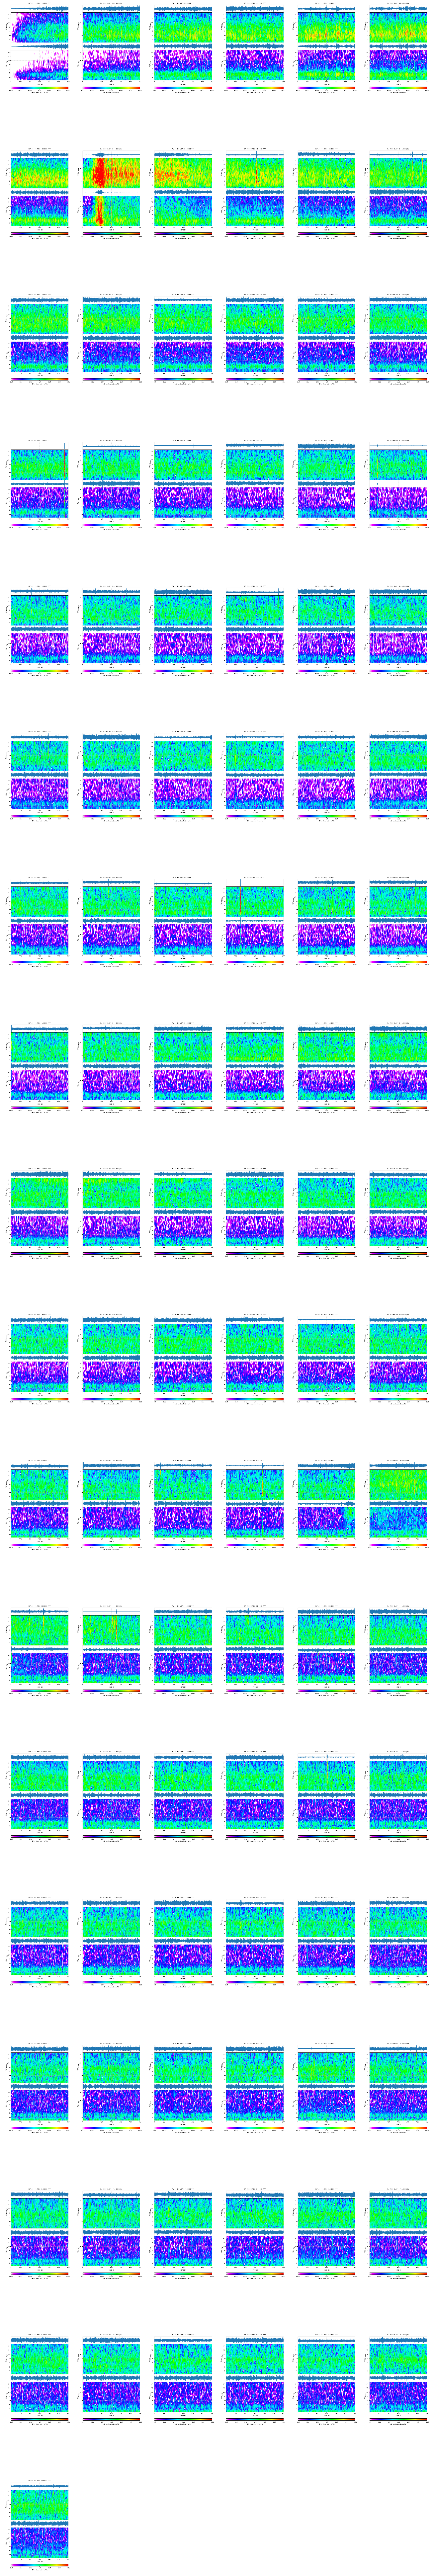

In [10]:
# Next show all images side by side using example from: 
# https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/
# except, use axes to specify exactly where to plot
# then add prev, next buttons
#import libraries
#import cv2
#import imageio as iio
import glob
import matplotlib.pyplot as plt
import numpy as np
  
# create figure
fig = plt.figure(figsize=(18, 144))
  
# reading images
imagefiles = sorted(glob.glob("NZ.*.png"))
#print(imagefiles)
if len(imagefiles)==0:
    raise ValueError('No image files found')
    
# setting values to rows and column variables
nrows = int(np.ceil(len(imagefiles) / 6))
#print(nrows)
ncolumns = int(np.ceil(len(imagefiles) / nrows))
#print(ncolumns)

Images = []
for n,imagefile in enumerate(imagefiles):  
    Images.append(plt.imread(imagefile))
  
    # Adds a subplot at the 1st position
    ax = fig.add_subplot(nrows, ncolumns, n+1)
    l, b, w, h = ax.get_position().bounds
    #print(n, l, b, w, h)
    ll = (n % ncolumns) / ncolumns
    ww = 1/ncolumns
    #print(n, ll, b, ww, h)
    ax.set_position([ll, b, ww, h])
  
    # showing image
    plt.imshow(Images[-1])
    plt.axis('off')
    #plt.title("Sgram %d" % (n+1))
    



In [ ]:
#import os
import sys
from obspy.core import UTCDateTime
import importlib
sys.path.append('../lib')
import FDSNtools
import wrappers
importlib.reload(wrappers)


SDS_TOP='/RAIDZ/DATA/SDS'
trace_ids = ['NZ.WIZ.10.HHZ', 'NZ.WSRZ.10.HHZ']
centerlat=-37.52
centerlon=177.1825
searchRadiusDeg=0.25
fdsnURL = "GEONET"
subnet = 'Whakaari'
SGRAM_TOP = '/RAIDZ/IceWeb'


startt = UTCDateTime(2019,12,8)
endt = UTCDateTime(2019,12,9)
inv = FDSNtools.get_inventory(fdsnURL, startt, endt, centerlat, centerlon, searchRadiusDeg, network='NZ', station='*', channel='HHZ')
wrappers.FDSN_to_SDS_daily_wrapper(startt-3600, endt, SDS_TOP, trace_ids=trace_ids, \
        fdsnURL=fdsnURL, overwrite=False, inv=inv)
wrappers.SDS_to_ICEWEB_wrapper(startt, endt, SDS_TOP, sampling_interval=60.0, sourcelat=centerlat, \
            sourcelon=centerlon, inv=inv, trace_ids=trace_ids, overwrite=True, verbose=False, sgrammins=10, \
                equal_scale=True, dbscale=True, clim=[1e-8, 1e-5], subnet=subnet, SGRAM_TOP=SGRAM_TOP)

Trying to load inventory from 2019/12/08 00:00 to 2019/12/09 00:00
2019-12-07T23:00:00.000000Z
2019-12-08T23:00:00.000000Z
2019-12-08T00:00:00.000000Z
-37.526515575 177.189407876 -37.52 177.1825
-37.51811 177.177805 -37.52 177.1825
2 Trace(s) in Stream:
NZ.WIZ.10.HHZ  | 2019-12-07T23:00:00.003122Z - 2019-12-09T01:00:00.003122Z | 100.0 Hz, 9360001 samples
NZ.WSRZ.10.HHZ | 2019-12-07T23:00:00.003124Z - 2019-12-09T01:00:00.003124Z | 100.0 Hz, 9360001 samples [946.58590299621551, 464.35177231642371]
2 Trace(s) in Stream:
NZ.WSRZ.10.HHZ | 2019-12-07T23:00:00.003124Z - 2019-12-09T01:00:00.003124Z | 100.0 Hz, 9360001 samples
NZ.WIZ.10.HHZ  | 2019-12-07T23:00:00.003122Z - 2019-12-09T01:00:00.003122Z | 100.0 Hz, 9360001 samples [464.35177231642371, 946.58590299621551]
Processing NZ.WSRZ.10.HHZ
Processing NZ.WIZ.10.HHZ
/RAIDZ/DATA/SDS/CSAM/mean/2019/NZ/WSRZ/HHZ.D
/RAIDZ/DATA/SDS/CSAM/mean/2019/NZ/WSRZ/HHZ.D/NZ.WSRZ.10.HHZ.D.2019.342  does not already exist. Writing
/RAIDZ/DATA/SDS/CSAM/mean/2019

/home/thompsong/anaconda3/envs/nexus/lib/python3.6/site-packages/obspy-0.0.0+archive-py3.6-linux-x86_64.egg/obspy/io/mseed/core.py:774: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


/RAIDZ/DATA/SDS/DRS/median/2019/NZ/WSRZ/HHZ.D
/RAIDZ/DATA/SDS/DRS/median/2019/NZ/WSRZ/HHZ.D/NZ.WSRZ.10.HHZ.D.2019.342  does not already exist. Writing
/RAIDZ/DATA/SDS/DRS/median/2019/NZ/WIZ/HHZ.D
/RAIDZ/DATA/SDS/DRS/median/2019/NZ/WIZ/HHZ.D/NZ.WIZ.10.HHZ.D.2019.342  does not already exist. Writing
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-000000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa771693588>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-001000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa77148ce10>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-002000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7712b20b8>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-003000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7710f6048>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-004000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa76

Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa73e6c7a20>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-040000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa73e567be0>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-041000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa73e3616a0>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-042000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa73e36f940>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-043000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa73e01d940>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-044000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa73deb9b70>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-045000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa711b17550>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-050000.png
Figure

Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa303d3ea20>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-081000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2f4be3cc0>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-082000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2dca30710>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-083000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2d81e9d68>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-084000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2b0f0a7b8>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-085000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa29d5a7710>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-090000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa287801ba8>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-091000.png
Figure

/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-121000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0e8669b38>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-122000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0d28bc748>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-123000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0bcb14a58>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-124000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0a6d7ca20>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-125000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa09103db70>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-130000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa07b299550>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-131000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0654eea90>
/RAIDZ

Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7f9edc07e390>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-162000.png
Figure(414.72x544.32) [<matplotlib.axes._subplots.AxesSubplot object at 0x7f9edc092a58>
/RAIDZ/IceWeb/NZ/2019/%J/Whakaari_20191208-163000.png


In [ ]:
# Think about how to implement a config dict, e.g. to loop over multiple subnets
subnets = {'WhiteIsland':trace_ids}
config = [{'subnet':'WhiteIsland', 'trace_ids':trace_ids, 'source':{'lat':sourcelat, 'lon':sourcelon} }]
